## Imaging the Spike

In [3]:
# Spike images
from mpl_toolkits.mplot3d import axes3d
import numpy as np
import urllib2
import scipy.stats as stats
import matplotlib.pyplot as plt
from image_builder import get_image

np.set_printoptions(precision=3, suppress=True)
url = ('https://raw.githubusercontent.com/Upward-Spiral-Science'
       '/data/master/syn-density/output.csv')
data = urllib2.urlopen(url)
csv = np.genfromtxt(data, delimiter=",")[1:] # don't want first row (labels)

# chopping data based on thresholds on x and y coordinates
x_bounds = (409, 3529)
y_bounds = (1564, 3124)

def check_in_bounds(row, x_bounds, y_bounds):
    if row[0] < x_bounds[0] or row[0] > x_bounds[1]:
        return False
    if row[1] < y_bounds[0] or row[1] > y_bounds[1]:
        return False
    if row[3] == 0:
        return False
    
    return True

indices_in_bound, = np.where(np.apply_along_axis(check_in_bounds, 1, csv,
                                                 x_bounds, y_bounds))
data_thresholded = csv[indices_in_bound]
n = data_thresholded.shape[0]


def synapses_over_unmasked(row):
    s = (row[4]/row[3])*(64**3)
    return [row[0], row[1], row[2], s]
syn_unmasked = np.apply_along_axis(synapses_over_unmasked, 1, data_thresholded)
syn_normalized = syn_unmasked

### We're going to extract images of representing the bins in the spike

In [4]:
a = np.apply_along_axis(lambda x:x[4]/x[3], 1, data_thresholded)
spike = a[np.logical_and(a <= 0.0015, a >= 0.0012)]
n, bins, _ = plt.hist(spike, 2000)
bin_max = np.where(n == n.max())
bin_width = bins[1]-bins[0]
syn_normalized[:,3] = syn_normalized[:,3]/(64**3)
spike = syn_normalized[np.logical_and(syn_normalized[:,3] <= 0.00131489435301+bin_width, syn_normalized[:,3] >= 0.00131489435301-bin_width)]
spike_thres = data_thresholded[np.logical_and(syn_normalized[:,3] <= 0.00131489435301+bin_width, syn_normalized[:,3] >= 0.00131489435301-bin_width)]
len_spike = len(spike_thres)

# Compare some of the bins represented the spike
xs = np.unique(spike_thres[:,0])
ys = np.unique(spike_thres[:,1])
name = 'spike'
get_image((0,10),(0,10),xs,ys,name)


<img src='spike0_0.bmp' style="width: 800px;"/>

### Distributions of Synapses across x, y, z in spike

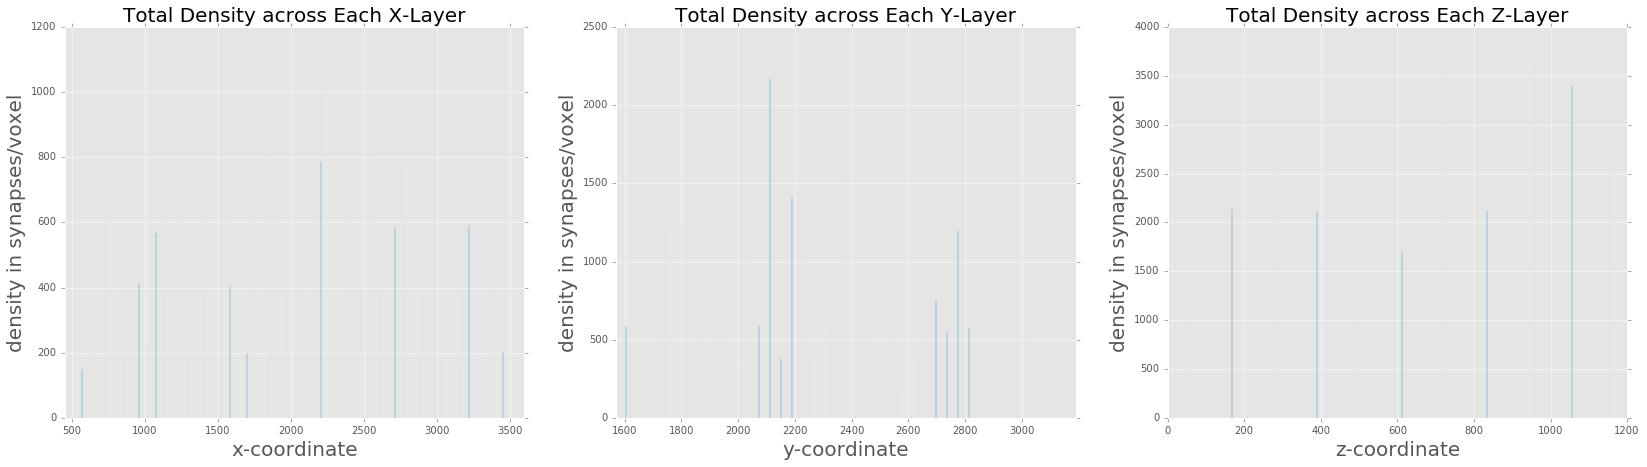

In [12]:
%matplotlib inline
unique_x = np.unique(spike_thres[:,0])
unique_y = np.unique(spike_thres[:,1])
unique_z = np.unique(spike_thres[:,2])

x_sum = [0] * len(unique_x)
for i in range(len(unique_x)):
    x_sum[i] = sum(spike_thres[spike_thres[:,0]==unique_x[i]][:,4])
    
y_sum = [0] * len(unique_y)
for i in range(len(unique_y)):
    y_sum[i] = sum(spike_thres[spike_thres[:,1]==unique_y[i]][:,4])
    
z_sum = [0] * len(unique_z)
for i in range(len(unique_z)):
    z_sum[i] = sum(spike_thres[spike_thres[:,2]==unique_z[i]][:,4])

plt.figure()
plt.figure(figsize=(28,7))

plt.subplot(131)
plt.bar(unique_x, x_sum, 1)
plt.xlim(450, 3600)
plt.ylabel('density in synapses/voxel',fontsize=20)
plt.xlabel('x-coordinate',fontsize=20)
plt.title('Total Density across Each X-Layer',fontsize=20)

plt.subplot(132)
plt.bar(unique_y, y_sum, 1)
plt.xlim(1570, 3190)
plt.ylabel('density in synapses/voxel',fontsize=20)
plt.xlabel('y-coordinate',fontsize=20)
plt.title('Total Density across Each Y-Layer',fontsize=20)

plt.subplot(133)
plt.bar(unique_z, z_sum, 1)
plt.ylabel('density in synapses/voxel',fontsize=20)
plt.xlabel('z-coordinate',fontsize=20)
plt.title('Total Density across Each Z-Layer',fontsize=20)